In [1]:
setwd("D:/OneDrive - g.ntu.edu.tw/110/流病與統計")
rate <- read.csv("rate.csv",header=TRUE)
attach(rate)
rate

Age,PY,Death,sex
1,1299868,55,m
2,1240595,49,m
3,1045453,38,m
4,795776,26,m
5,645991,19,m
6,599729,17,m
7,568109,22,m
8,506475,21,m
9,368751,18,m
10,252581,11,m


In [2]:
newtonraphson <- function(ftn, x0, tol = 1e-9, max.iter = 100) {
 x <- x0 # x0: the initial value
 fx <- ftn(x)
 iter <- 0
 while ((max(abs(fx[[1]])) > tol) & (iter < max.iter)) {
 x <- x - solve(fx[[2]]) %*% fx[[1]]
 fx <- ftn(x)
iter <- iter + 1
 }
 if (max(abs(fx[[1]])) > tol) {
 cat('Algorithm failed to converge\n')
return(NULL)
 } else { # max(abs(fx[[1]])) <= tol
cat("Algorithm converged\n")
return(x)
 }
}


In [3]:
ftn <- function(beta_coef){
    age2 <- ifelse(Age==2,1,0)
    age3 <- ifelse(Age==3,1,0)
    age4 <- ifelse(Age==4,1,0)
    age5 <- ifelse(Age==5,1,0)
    age6 <- ifelse(Age==6,1,0)
    age7 <- ifelse(Age==7,1,0)
    age8 <- ifelse(Age==8,1,0)
    age9 <- ifelse(Age==9,1,0)
    age10 <- ifelse(Age==10,1,0)
    age11 <- ifelse(Age==11,1,0)
    age12 <- ifelse(Age==12,1,0)
    mat <- cbind(rep(1,length(Death)),age2,age3,age4,age5,age6,age7,age8,age9,age10,age11,age12,
                 ifelse(sex=="m",1,0))
    mu <- exp(mat%*%beta_coef+log(PY/100000))
    grad <- t(mat)%*%(Death-mu)
    hess <- -t(mat)%*%diag(c(mu),length(Death))%*%mat
    logli <- sum(-mu+Death*log(mu)-log(factorial(Death)))
    return(list(grad,hess,logli))
}

Please use the Newton-Raphson method to find the maximum likelihood estimate (MLE) of the
regression coefficients of Poisson regression

In [4]:
beta <- newtonraphson(ftn,c(0,0,0,0,0,0,0,0,0,0,0,0,0))
cat("\n\t\tbeta\n
intercept:",beta[1],"\n
age2:  ",beta[2],"\n
age3:  ",beta[3],"\n
age4:  ",beta[4],"\n
age5:  ",beta[5],"\n
age6:  ",beta[6],"\n
age7:  ",beta[7],"\n
age8:   ",beta[8],"\n
age9:   ",beta[9],"\n
age10:  ",beta[10],"\n
age11:  ",beta[11],"\n
age12:  ",beta[12],"\n
SEX:  \t",beta[13])

Algorithm converged

		beta

intercept: 0.9445353 

age2:   -0.1115876 

age3:   -0.193074 

age4:   -0.3999453 

age5:   -0.5752875 

age6:   -0.4011466 

age7:   -0.311421 

age8:    0.04452828 

age9:    0.0730133 

age10:   0.1711177 

age11:   0.1525637 

age12:   -0.2711573 

SEX:  	 0.5606453

Please find the variance-covariance matrix

In [5]:
solve(-ftn(beta)[[2]])

,,age2,age3,age4,age5,age6,age7,age8,age9,age10,age11,age12,
,0.014509599,-1.084465e-02,-1.086946e-02,-1.089294e-02,-1.090877e-02,-0.0109423347,-0.0110516743,-0.0110990021,-0.0112129343,-0.0114209388,-0.01170770,-0.012212644,-5.718767e-03
age2,-0.010844653,2.369025e-02,1.086957e-02,1.086941e-02,1.086930e-02,0.0108690672,0.0108683189,0.0108679950,0.0108672153,0.0108657917,0.01086383,0.010860373,-3.913833e-05
age3,-0.010869462,1.086957e-02,2.726301e-02,1.086956e-02,1.086956e-02,0.0108695632,0.0108695601,0.0108695587,0.0108695555,0.0108695496,0.01086954,0.010869527,-1.619563e-07
age4,-0.010892943,1.086941e-02,1.086956e-02,3.718550e-02,1.086982e-02,0.0108700326,0.0108707348,0.0108710388,0.0108717705,0.0108731064,0.01087495,0.010878191,3.672866e-05
age5,-0.010908767,1.086930e-02,1.086956e-02,1.086982e-02,4.933153e-02,0.0108703489,0.0108715264,0.0108720361,0.0108732631,0.0108755032,0.01087859,0.010884030,6.158833e-05
age6,-0.010942335,1.086907e-02,1.086956e-02,1.087003e-02,1.087035e-02,0.0453537786,0.0108732058,0.0108741520,0.0108764297,0.0108805880,0.01088632,0.010896415,1.143263e-04
age7,-0.011051674,1.086832e-02,1.086956e-02,1.087073e-02,1.087153e-02,0.0108732058,0.0431367406,0.0108810438,0.0108867438,0.0108971502,0.01091150,0.010936759,2.861071e-04
age8,-0.011099002,1.086799e-02,1.086956e-02,1.087104e-02,1.087204e-02,0.0108741520,0.0108810438,0.0358840270,0.0108912083,0.0109043191,0.01092239,0.010954221,3.604625e-04
age9,-0.011212934,1.086722e-02,1.086956e-02,1.087177e-02,1.087326e-02,0.0108764297,0.0108867438,0.0108912083,0.0431600202,0.0109215770,0.01094863,0.010996260,5.394587e-04
age10,-0.011420939,1.086579e-02,1.086955e-02,1.087311e-02,1.087550e-02,0.0108805880,0.0108971502,0.0109043191,0.0109215770,0.0509530845,0.01099652,0.011073008,8.662494e-04


whole matrix

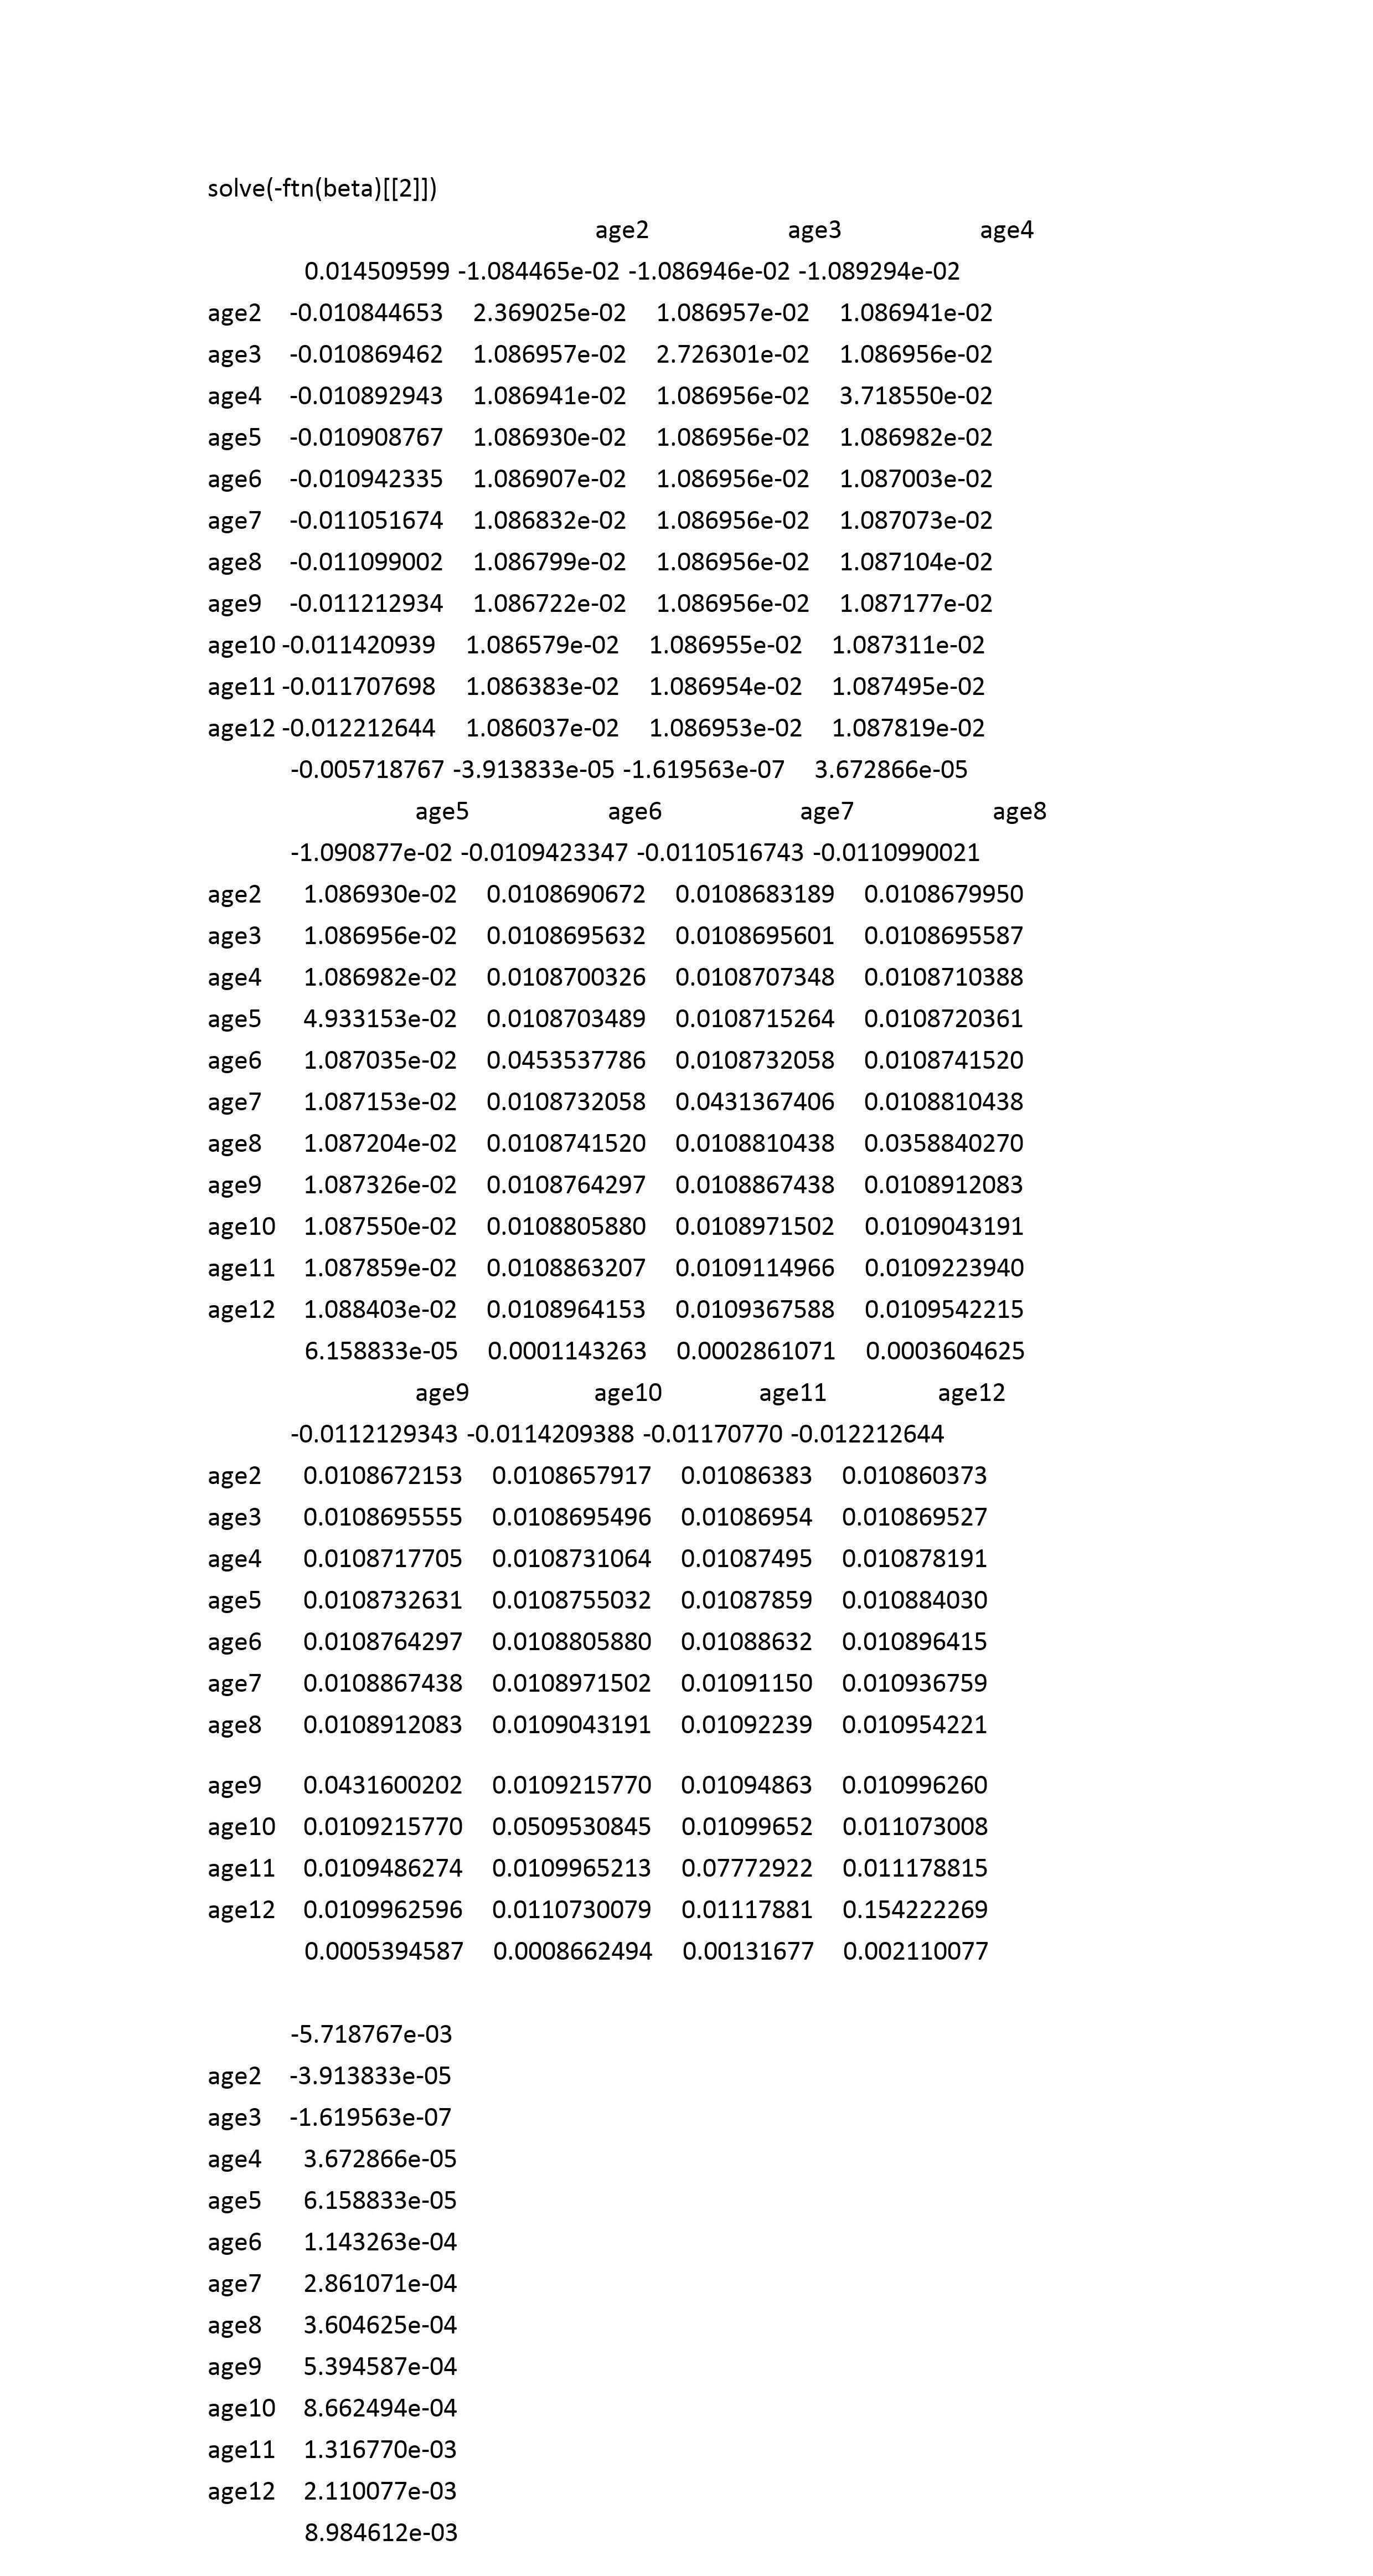

Please find the log likelihood

In [6]:
cat("log likelihood at beta: ",ftn(beta)[[3]])

log likelihood at beta:  -59.38966